Data loaded successfully.
Date column converted and set as index.
'views' and 'estimatedMinutesWatched' columns converted to numeric.
Daily views data prepared for plotting.
Views per video data prepared for plotting.
Engagement distribution data prepared for plotting.
Daily minutes watched data prepared for plotting.


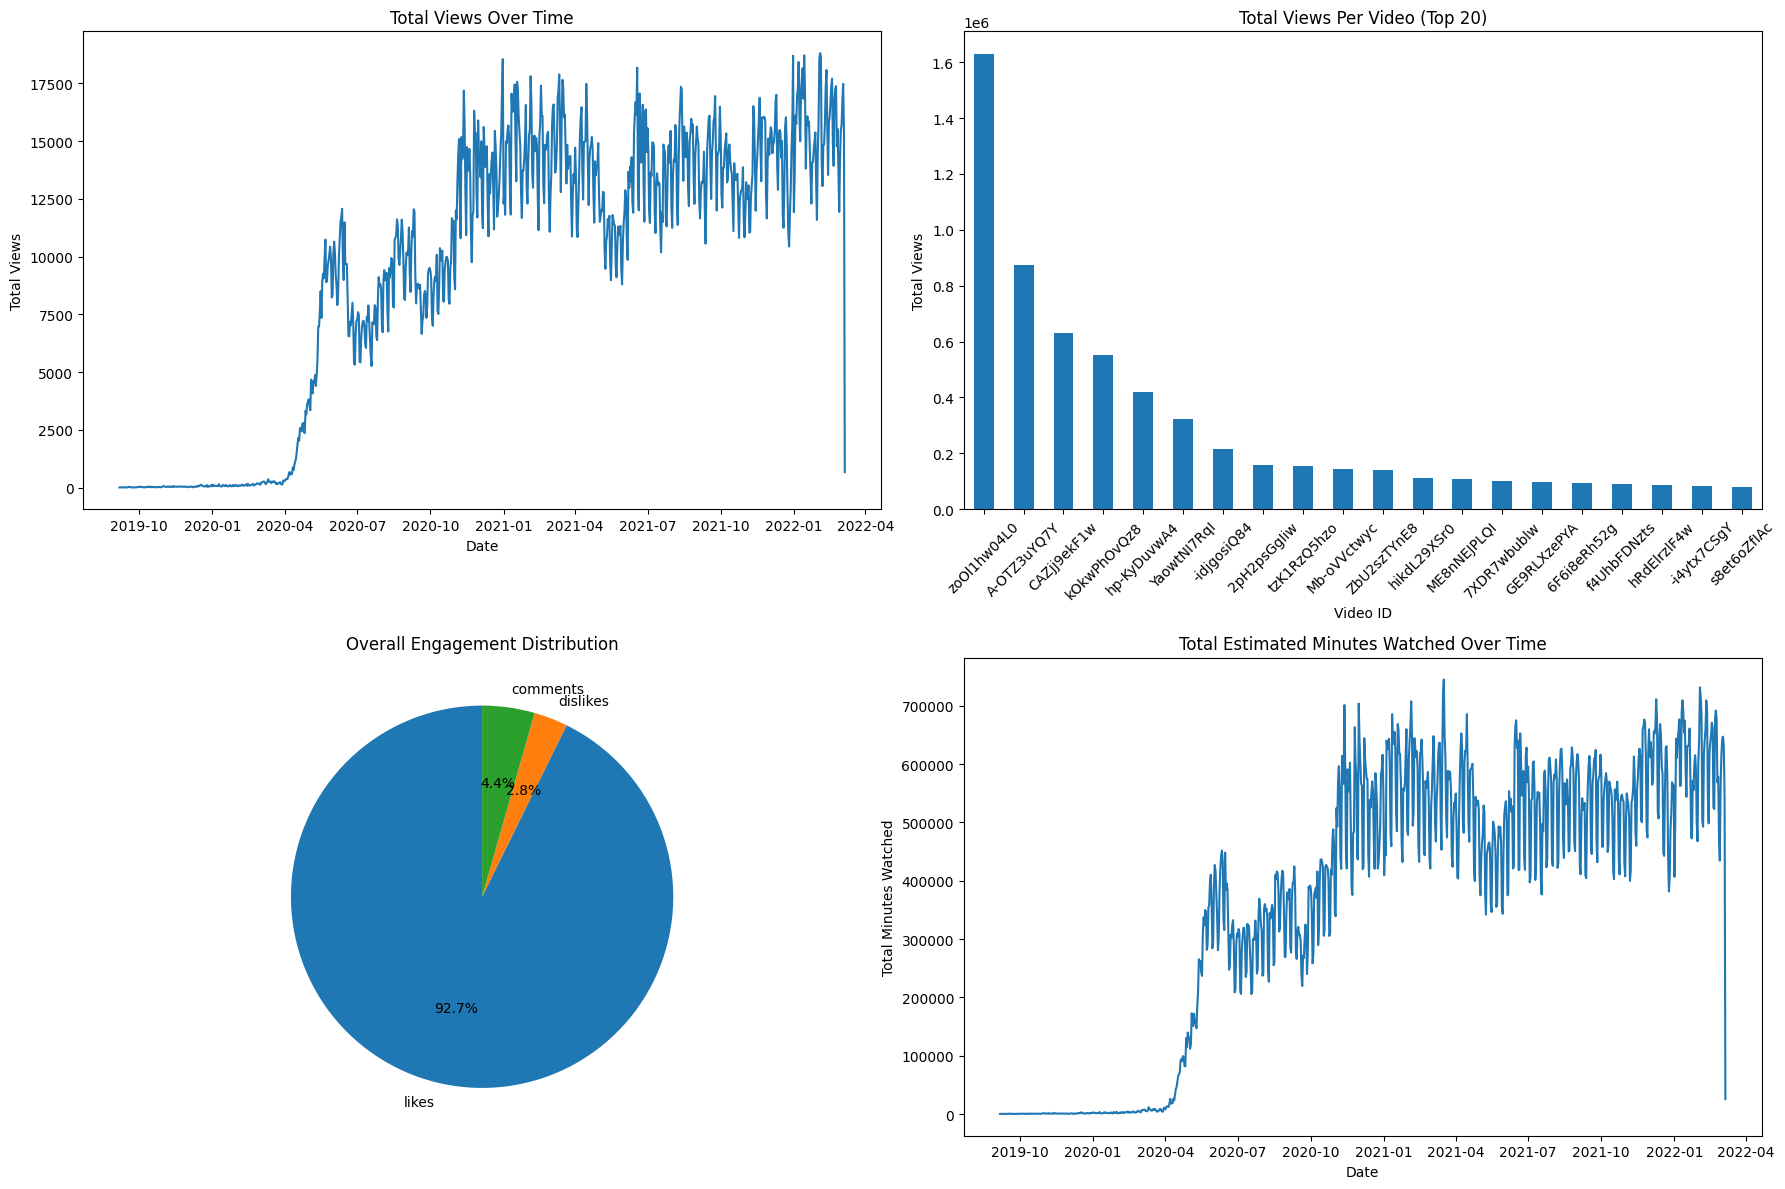

Dashboard generated.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data, skipping bad lines
try:
    df = pd.read_csv('/content/all_youtube_analytics.csv', on_bad_lines='skip')
    print("Data loaded successfully.")
except Exception as e:
    print(f"An error occurred during data loading: {e}")

# Prepare data for time series: Convert 'day' to datetime and set as index
try:
    df['day'] = pd.to_datetime(df['day'], errors='coerce', format='mixed')
    df = df.dropna(subset=['day']) # Remove rows where date conversion failed
    df = df.set_index('day')
    df = df.sort_index()
    print("Date column converted and set as index.")
except Exception as e:
    print(f"An error occurred during date conversion: {e}")

# Prepare 'views' and 'estimatedMinutesWatched' for plotting: Convert to numeric
try:
    df['views'] = pd.to_numeric(df['views'], errors='coerce')
    df = df.dropna(subset=['views']) # Remove rows where views conversion failed
    df['estimatedMinutesWatched'] = pd.to_numeric(df['estimatedMinutesWatched'], errors='coerce')
    df = df.dropna(subset=['estimatedMinutesWatched']) # Remove rows where minutes watched conversion failed
    print("'views' and 'estimatedMinutesWatched' columns converted to numeric.")
except Exception as e:
    print(f"An error occurred during numeric conversion: {e}")


# 1. Prepare daily views over time
try:
    daily_views = df['views'].resample('D').sum()

    # plt.figure(figsize=(12, 6)) # Remove individual plot generation
    # daily_views.plot(kind='line')
    # plt.xlabel('Date')
    # plt.ylabel('Total Views')
    # plt.title('Total Views Over Time')
    # plt.show()
    print("Daily views data prepared for plotting.") # Update print message
except Exception as e:
    print(f"An error occurred during daily views plotting: {e}")

# 2. Prepare views per video
try:
    views_per_video = df.groupby('video_id')['views'].sum()
    views_per_video_sorted = views_per_video.sort_values(ascending=False)

    # plt.figure(figsize=(15, 7)) # Remove individual plot generation
    # views_per_video_sorted.head(20).plot(kind='bar')
    # plt.xlabel('Video ID')
    # plt.ylabel('Total Views')
    # plt.title('Total Views Per Video (Top 20)')
    # plt.xticks(rotation=45, ha='right')
    # plt.tight_layout()
    # plt.show()
    print("Views per video data prepared for plotting.") # Update print message
except Exception as e:
    print(f"An error occurred during views per video plotting: {e}")

# 3. Prepare engagement distribution pie chart
try:
    engagement_per_video = df.groupby('video_id')[['likes', 'dislikes', 'comments']].sum()
    engagement_sums = engagement_per_video.sum()
    engagement_series = pd.Series(engagement_sums, index=['likes', 'dislikes', 'comments'])

    # plt.figure(figsize=(8, 8)) # Remove individual plot generation
    # engagement_series.plot(kind='pie', autopct='%1.1f%%', startangle=90)
    # plt.ylabel('') # Remove the default y-label
    # plt.title('Overall Engagement Distribution (Likes/Dislikes/Comments)')
    # plt.show()
    print("Engagement distribution data prepared for plotting.") # Update print message
except Exception as e:
    print(f"An error occurred during engagement plotting: {e}")

# 4. Prepare estimated minutes watched over time
try:
    daily_minutes_watched = df['estimatedMinutesWatched'].resample('D').sum()
    print("Daily minutes watched data prepared for plotting.")
except Exception as e:
    print(f"An error occurred during daily minutes watched plotting: {e}")


# Combine and display plots (Dashboard)
try:
    fig, axes = plt.subplots(2, 2, figsize=(18, 12))

    # Plot daily views over time
    axes[0, 0].plot(daily_views)
    axes[0, 0].set_xlabel('Date')
    axes[0, 0].set_ylabel('Total Views')
    axes[0, 0].set_title('Total Views Over Time')

    # Plot views per video (Top 20)
    views_per_video_sorted.head(20).plot(kind='bar', ax=axes[0, 1])
    axes[0, 1].set_xlabel('Video ID')
    axes[0, 1].set_ylabel('Total Views')
    axes[0, 1].set_title('Total Views Per Video (Top 20)')
    axes[0, 1].tick_params(axis='x', rotation=45, labelrotation=45) # Corrected parameter name to labelrotation


    # Plot engagement distribution pie chart
    engagement_series.plot(kind='pie', ax=axes[1, 0], autopct='%1.1f%%', startangle=90)
    axes[1, 0].set_ylabel('') # Remove the default y-label
    axes[1, 0].set_title('Overall Engagement Distribution')

    # Plot daily estimated minutes watched over time
    axes[1, 1].plot(daily_minutes_watched)
    axes[1, 1].set_xlabel('Date')
    axes[1, 1].set_ylabel('Total Minutes Watched')
    axes[1, 1].set_title('Total Estimated Minutes Watched Over Time')


    plt.tight_layout()
    plt.show()
    print("Dashboard generated.")
except Exception as e:
    print(f"An error occurred during dashboard generation: {e}")